# Aufgabe F

- Train a neural net and overfit it to cifar.
- Don't use any regularization.
- Don't use my crappy implementation, but use keras. Use the train and test splits in the data do
- evaluate the model.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import keras

from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras import backend as K


Using TensorFlow backend.


# Datenset vorbereiten

In [0]:
batch_size = 32 #128
num_classes = 10
epochs = 20 #Wiederholungen (für Testzweck vllt. 3 / für endgültige Lösung ca. 20)

# Bildgröße für Input
img_rows, img_cols = 32, 32

In [3]:
# Datenset, unterteilt in Trainings-/Testset
cifar = cifar10
(x_train, y_train), (x_test, y_test) = cifar.load_data()

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

170500096/170498071 [==============================] - 2s 0us/step
x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [4]:
x_train.shape

(50000, 32, 32, 3)

In [0]:
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 3, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0],3, img_rows, img_cols)
    input_shape = (3, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 3)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 3)
    input_shape = (img_rows, img_cols, 3)

In [6]:
# Aufräumen + Anpassen

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


# Modell erstellen 

In [0]:
def model():
    
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape))  
    model.add(Conv2D(32, (3, 3), activation='relu'))    
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))    
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())    
    model.add(Dense(512, activation='relu'))   
    model.add(Dense(num_classes, activation='softmax'))
     
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])   
    model.summary()    
    return model

In [8]:
model = model()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________

# Modell trainieren + Auswertung

In [9]:
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test)) #daueeeert!!!

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 235s 5ms/sample - loss: 1.3284 - acc: 0.5238 - val_loss: 1.0284 - val_acc: 0.6350
Epoch 2/20
50000/50000 [==============================] - 233s 5ms/sample - loss: 0.8601 - acc: 0.6972 - val_loss: 0.8256 - val_acc: 0.7135
Epoch 3/20
50000/50000 [==============================] - 238s 5ms/sample - loss: 0.6621 - acc: 0.7691 - val_loss: 0.7709 - val_acc: 0.7372
Epoch 4/20
50000/50000 [==============================] - 239s 5ms/sample - loss: 0.5138 - acc: 0.8193 - val_loss: 0.7893 - val_acc: 0.7430
Epoch 5/20
50000/50000 [==============================] - 239s 5ms/sample - loss: 0.3695 - acc: 0.8701 - val_loss: 0.8681 - val_acc: 0.7420
Epoch 6/20
50000/50000 [==============================] - 238s 5ms/sample - loss: 0.2622 - acc: 0.9074 - val_loss: 0.9290 - val_acc: 0.7497
Epoch 7/20
50000/50000 [==============================] - 239s 5ms/sample - loss: 0.1790 - acc: 0.9372 - val_l

In [10]:
#Auswertung
ergebnis = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', ergebnis[0])
print('Test accuracy:', ergebnis[1])


Test loss: 1.950222935771942
Test accuracy: 0.7443


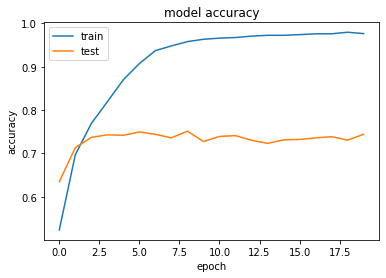

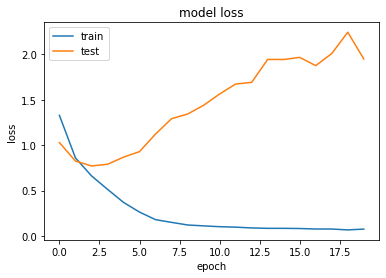

In [12]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Overfitting ist ein Szenario, in dem das Modell bei Trainingsdaten gut abschneidet, aber bei Daten, die während des Trainings nicht sichtbar sind, schlecht abschneidet. Dies bedeutet im Grunde genommen, dass Ihr Modell die Trainingsdaten auswendig gelernt hat, anstatt die Beziehungen zwischen Features und Labels zu erlernen.

Overfitting ist mit den verfügbaren Genauigkeitsvisualisierungen einfach zu diagnostizieren. Wenn "Accuracy" (gemessen am Trainingsset) sehr gut ist und "Validation Accuracy" (gemessen an einem Validierungsset) nicht so gut ist, dann passt das Modell overfitted.

Die Genauigkeit beim Trainingsset von 97.71% zeigt zwar, dass das Modell prinzipiell gut funktioniert, allerdings ernüchtert das Ergebnis dann leider beim Testset - 73.67%. Der Unterschied von 24.04 Prozentpunkten zeigt, dass unser neuronales Netz overfitted. Das bedeutet, dass das Trainingsset von unserem neuronalem Netz auswendig gelernt wurde. Dieser Punkt ist auch gut in den obrigen Graphen zu sehen, wenn im model accuracy Graphen die train Linie sich mit der test Linie schneidet.